### 数据基本信息预览

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#读取文件数据
df=pd.read_csv('diabetes_data.csv')
#展示数据前15行
df.head(15)
# 查看数据类型
df.info()
# 数据描述
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 23 columns):
id                      300000 non-null int64
HighBP                  300000 non-null float64
HighChol                300000 non-null float64
CholCheck               300000 non-null float64
BMI                     300000 non-null float64
Smoker                  300000 non-null float64
Stroke                  300000 non-null float64
HeartDiseaseorAttack    300000 non-null float64
PhysActivity            300000 non-null float64
Fruits                  300000 non-null float64
Veggies                 300000 non-null float64
HvyAlcoholConsump       300000 non-null float64
AnyHealthcare           300000 non-null float64
NoDocbcCost             300000 non-null float64
GenHlth                 300000 non-null float64
MentHlth                300000 non-null float64
PhysHlth                300000 non-null float64
DiffWalk                300000 non-null float64
Sex                     300

,id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,149999.500000,0.430242,0.424958,0.966981,28.413251,0.448207,0.037682,0.090392,0.762769,0.642363,...,0.077537,2.504301,3.180385,4.229010,0.164786,0.437267,8.080662,5.064394,6.085121,0.300000
std,86602.684716,0.486627,0.485170,0.173147,6.706940,0.487675,0.183704,0.278855,0.414860,0.469067,...,0.258544,1.050306,7.407253,8.714524,0.363119,0.487002,3.033612,0.963329,2.045542,0.700001
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,74999.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.737870,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,149999.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,224999.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,299999.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,2.000000


In [2]:
import pandas as pd
# 加载数据
df = pd.read_csv('diabetes_data.csv')
# 去除首列（id列），假设它是第一列且列名为'id'（如果不是，请替换为实际的列名）
df = df.drop(columns=['id'])
# 二值化处理target列便于之后的相关性分析
df['target'] = (df['target'] != 0).astype(int)
# 保存处理后的数据至新的CSV文件
df.to_csv('diabetes_data01.csv', index=False)

### 计算target字段的数值分布数量 发现存在样本不平衡现象

In [3]:
import pandas as pd
df = pd.read_csv('diabetes_data.csv')
# 计算target字段的数值分布数量
target_counts = df['target'].value_counts()
print(target_counts)

0.0    252000
2.0     42000
1.0      6000
Name: target, dtype: int64


In [4]:
import pandas as pd
df = pd.read_csv('diabetes_data01.csv')
target_counts = df['target'].value_counts()
print(target_counts)

0    252000
1     48000
Name: target, dtype: int64


#### BMI属性字段分类处理

In [ ]:
import pandas as pd

# 假设'diabetes_data01.csv'是您的CSV文件名，且其中包含了BMI列
df = pd.read_csv('diabetes_data01.csv')

# 定义一个函数，根据BMI值进行分类（四类）
def classify_BMI(bmi):
    if bmi < 18.5:
        return '偏瘦'
    elif 18.5 <= bmi < 24.9:
        return '正常体重'
    elif 25 <= bmi < 29.9:
        return '超重'
    else:  # BMI 30及以上，统一归为“肥胖”
        return '肥胖'

# 应用这个函数到BMI列，创建一个新的分类列
df['BMI分类'] = df['BMI'].apply(classify_BMI)

# 查看结果
print(df[['BMI', 'BMI分类']])

              BMI BMI分类
0       18.119460    偏瘦
1       28.000000    超重
2       32.000000    肥胖
3       39.000000    肥胖
4       33.000000    肥胖
5       45.777107    肥胖
6       24.000000  正常体重
7       20.611214  正常体重
8       27.000000    超重
9       39.000000    肥胖
10      29.000000    超重
11      26.452276    超重
12      26.000000    超重
13      23.000000  正常体重
14      33.000000    肥胖
15      33.000000    肥胖
16      26.000000    超重
17      31.000000    肥胖
18      26.000000    超重
19      25.000000    超重
20      22.496085  正常体重
21      26.000000    超重
22      25.000000    超重
23      22.000000  正常体重
24      24.879824  正常体重
25      29.000000    超重
26      26.000000    超重
27      28.000000    超重
28      17.000000    偏瘦
29      30.000000    肥胖
...           ...   ...
299970  37.000000    肥胖
299971  24.000000  正常体重
299972  22.000000  正常体重
299973  32.000000    肥胖
299974  27.000000    超重
299975  32.000000    肥胖
299976  24.000000  正常体重
299977  29.000000    超重
299978  27.000000    超重
299979  33.00000

#### 收入income数据分类处理

### 可视化

In [ ]:
import pandas as pd

df = pd.read_csv('diabetes_data01.csv')

# 定义一个函数来根据income值进行分类
def classify_income(Income):
    if 1 <= Income <= 2:
        return '低收入'
    if 2 < Income <= 5:
        return '中等收入'
    if Income>5:
        return '高等收入'

# 应用这个函数到income列，创建一个新的分类列
df['Income_Category'] = df['Income'].apply(classify_income)

# 查看结果
print(df[['Income', 'Income_Category']])

          Income Income_Category
0       8.000000            高等收入
1       8.000000            高等收入
2       6.512774            高等收入
3       5.000000            中等收入
4       5.000000            中等收入
5       7.222893            高等收入
6       8.000000            高等收入
7       2.388786            中等收入
8       4.000000            中等收入
9       2.000000             低收入
10      8.000000            高等收入
11      8.000000            高等收入
12      1.000000             低收入
13      8.000000            高等收入
14      8.000000            高等收入
15      8.000000            高等收入
16      4.132664            中等收入
17      8.000000            高等收入
18      8.000000            高等收入
19      8.000000            高等收入
20      2.000000             低收入
21      8.000000            高等收入
22      7.000000            高等收入
23      5.581440            高等收入
24      8.000000            高等收入
25      8.000000            高等收入
26      6.000000            高等收入
27      8.000000            高等收入
28      8.000000            高等收入
29      6.

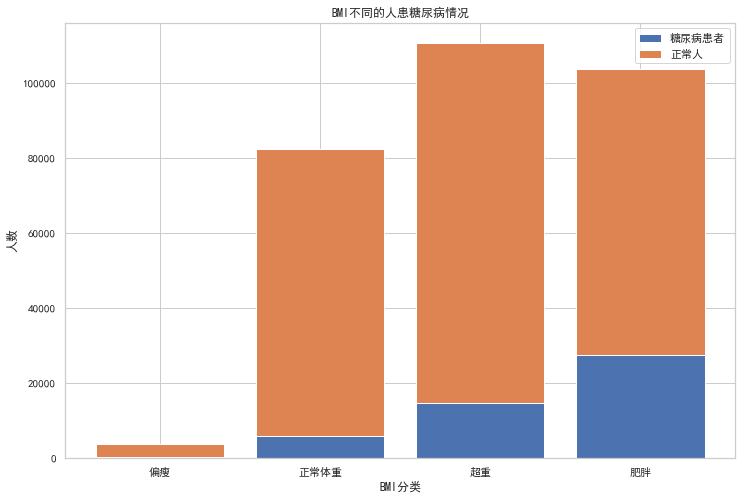

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
# 显示中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False  # 正确显示负号

df = pd.read_csv('diabetes_data01.csv')

# BMI分类函数
def classify_BMI(bmi):
    if bmi < 18.5:
        return '偏瘦'
    elif 18.5 <= bmi < 24.9:
        return '正常体重'
    elif 25 <= bmi < 29.9:
        return '超重'
    else:
        return '肥胖'

# 应用BMI分类函数
df['BMI分类'] = df['BMI'].apply(classify_BMI)

# 分类统计
diabetes_0_1 = df['BMI分类'][df['target'] == 0].value_counts()
diabetes_1_1 = df['BMI分类'][df['target'] == 1].value_counts()

# 创建DataFrame
df1 = pd.DataFrame({'糖尿病患者': diabetes_1_1, '正常人': diabetes_0_1})
df1 = df1.reindex(['偏瘦', '正常体重', '超重', '肥胖'], fill_value=0)  # 确保所有分类都存在，即使计数为0

# 绘图
fig = plt.figure(figsize=(12, 8))
a2 = plt.subplot(111)  # 使用1x1的子图布局

# 绘制堆叠条形图
a2.bar(df1.index, df1['糖尿病患者'], label='糖尿病患者')
a2.bar(df1.index, df1['正常人'], label='正常人', bottom=df1['糖尿病患者'].values)

# 添加标题和标签
a2.set_title(u"BMI不同的人患糖尿病情况")
a2.set_xlabel(u"BMI分类")
a2.set_ylabel(u"人数")
a2.legend(loc='best')

# 显示图形
plt.show()

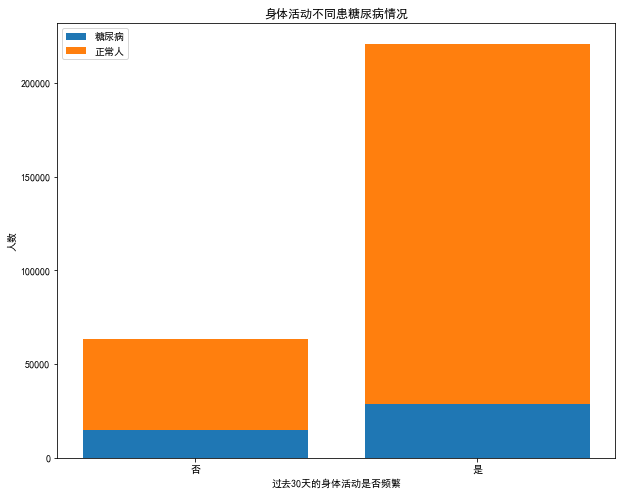

In [6]:
#PhysActivity
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
# 显示中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False  # 正确显示负号

dataConcat1 = pd.read_csv('diabetes_data01.csv')

# 计算男性和女性中糖尿病患者和正常人的数量
diabetes_0 = dataConcat1[dataConcat1['target'] == 0]['PhysActivity'].value_counts()
diabetes_1 = dataConcat1[dataConcat1['target'] == 1]['PhysActivity'].value_counts()

# 创建一个DataFrame来存储这些计数
df = pd.DataFrame({'糖尿病患者': diabetes_1, '正常人': diabetes_0})

phys_map = {1: '是',0 : '否'}
df = df[df.index.isin([0,1])]
df.index = df.index.map(phys_map)


df.index = df.index.astype(str)

# 创建一个条形图
fig = plt.figure(figsize=(10, 8))
a1=plt.subplot(111)  # 使用1x1的子图布局
a1.bar(df.index, df['糖尿病患者'], label='糖尿病')
a1.bar(df.index, df['正常人'], bottom=df['糖尿病患者'], label='正常人')

# 添加标题和标签
plt.title("身体活动不同患糖尿病情况")
plt.xlabel("过去30天的身体活动是否频繁")
plt.ylabel("人数")
plt.legend(loc='best')

# 显示图表
plt.show()


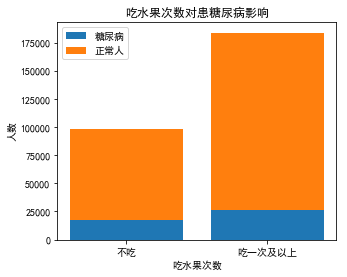

In [7]:
# 显示中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False  # 正确显示负号

dataConcat1 = pd.read_csv("diabetes_data01.csv")

# 计算吃水果次数，对应糖尿病患者和正常人的数量
diabetes_0 = dataConcat1[dataConcat1['target'] == 0]['Fruits'].value_counts()
diabetes_1 = dataConcat1[dataConcat1['target'] == 1]['Fruits'].value_counts()

# 创建一个DataFrame来存储这些计数
df = pd.DataFrame({'糖尿病患者': diabetes_1, '正常人': diabetes_0})

Fruits_map = {1: '吃一次及以上', 0: '不吃'}
# 只保留索引值为0或1的行
df = df[df.index.isin([0, 1])]
df.index = df.index.map(Fruits_map)


df.index = df.index.astype(str)

# 创建一个条形图
fig = plt.figure(figsize=(5, 4))
a1=plt.subplot(111)  # 使用1x1的子图布局
a1.bar(df.index, df['糖尿病患者'], label='糖尿病')
a1.bar(df.index, df['正常人'], bottom=df['糖尿病患者'], label='正常人')

# 添加标题和标签
plt.title("吃水果次数对患糖尿病影响")
plt.xlabel("吃水果次数")
plt.ylabel("人数")
plt.legend(loc='best')

# 显示图表
plt.show()




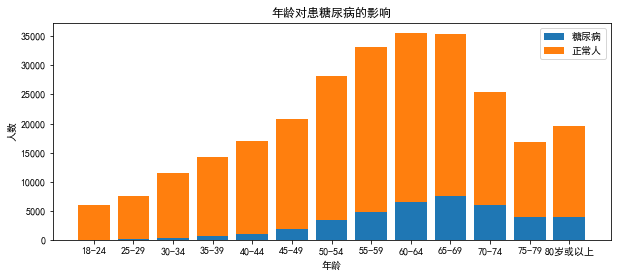

In [8]:

# 计算年龄，对应糖尿病患者和正常人的数量
diabetes_0 = dataConcat1[dataConcat1['target'] == 0]['Age'].value_counts()
diabetes_1 = dataConcat1[dataConcat1['target'] == 1]['Age'].value_counts()

# 创建一个DataFrame来存储这些计数
df = pd.DataFrame({'糖尿病患者': diabetes_1, '正常人': diabetes_0})

Age_map = {0:'18以下',1:'18-24',2: '25-29',3:'30-34',4:'35-39',5:'40-44',6:'45-49',7:'50-54',8:'55-59',9:'60-64',10:'65-69',11:'70-74',12:'75-79',13:'80岁或以上'}
# 只保留索引值为0或1的行
df = df[df.index.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13])]
df.index = df.index.map(Age_map)

df.index = df.index.astype(str)

# 创建一个条形图
fig = plt.figure(figsize=(10, 4))
a1=plt.subplot(111)  # 使用1x1的子图布局

a1.bar(df.index, df['糖尿病患者'], label='糖尿病')
a1.bar(df.index, df['正常人'], bottom=df['糖尿病患者'], label='正常人')

# 添加标题和标签
plt.title("年龄对患糖尿病的影响")
plt.xlabel("年龄")
plt.ylabel("人数")
plt.legend(loc='best')

# 显示图表
plt.show()

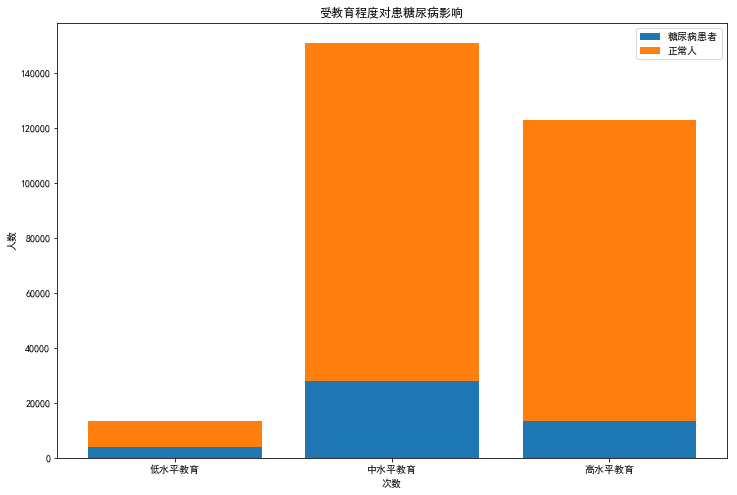

In [9]:

# Education分类
def classify_Education(education):
    if education <=3:
        return '低水平教育'
    elif 4<= education <=5:
        return '中水平教育'
    elif education>=6:
        return '高水平教育'

df=dataConcat1
# 应用Education分类函数
df['Education分类'] = df['Education'].apply(classify_Education)

# 计算教育，对应糖尿病患者和正常人的数量
diabetes_0_1 = df['Education分类'][df['target'] == 0].value_counts()
diabetes_1_1 = df['Education分类'][df['target'] == 1].value_counts()

# 创建DataFrame
df1 = pd.DataFrame({'糖尿病患者': diabetes_1_1, '正常人': diabetes_0_1})
df1 = df1.reindex(['低水平教育', '中水平教育', '高水平教育'], fill_value=0)  # 确保所有分类都存在，即使计数为0

# 绘图
fig = plt.figure(figsize=(12, 8))
a2 = plt.subplot(111)  # 使用1x1的子图布局

# 绘制堆叠条形图
a2.bar(df1.index, df1['糖尿病患者'], label='糖尿病患者')
a2.bar(df1.index, df1['正常人'], label='正常人', bottom=df1['糖尿病患者'].values)

# 添加标题和标签
plt.title("受教育程度对患糖尿病影响")
plt.xlabel("次数")
plt.ylabel("人数")
plt.legend(loc='best')

# 显示图表
plt.show()

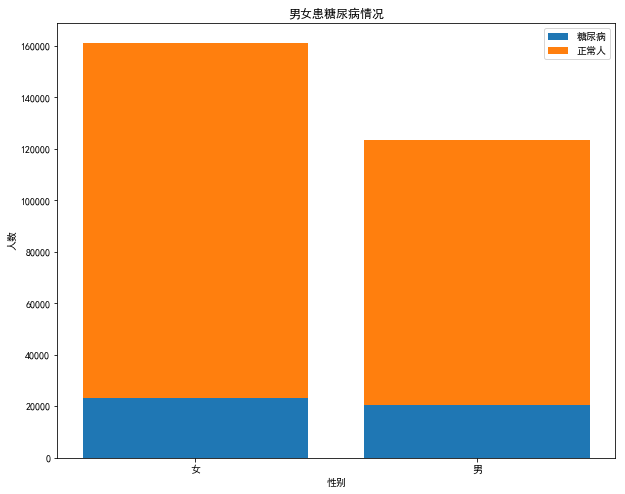

In [11]:
#sex
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
# 显示中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False  # 正确显示负号

dataConcat1 = pd.read_csv('diabetes_data01.csv')

# 计算男性和女性中糖尿病患者和正常人的数量
diabetes_0 = dataConcat1[dataConcat1['target'] == 0]['Sex'].value_counts()
diabetes_1 = dataConcat1[dataConcat1['target'] == 1]['Sex'].value_counts()

# 创建一个DataFrame来存储这些计数
df = pd.DataFrame({'糖尿病患者': diabetes_1, '正常人': diabetes_0})

# 映射到'男'和'女'
sex_map = {1: '男', 0: '女'}
# 只保留索引值为0或1的行
df = df[df.index.isin([0, 1])]
df.index = df.index.map(sex_map)


df.index = df.index.astype(str)

# 创建一个条形图
fig = plt.figure(figsize=(10, 8))
a1=plt.subplot(111)  # 使用1x1的子图布局
a1.bar(df.index, df['糖尿病患者'], label='糖尿病')
a1.bar(df.index, df['正常人'], bottom=df['糖尿病患者'], label='正常人')

# 添加标题和标签
plt.title("男女患糖尿病情况")
plt.xlabel("性别")
plt.ylabel("人数")
plt.legend(loc='best')

# 显示图表
plt.show()

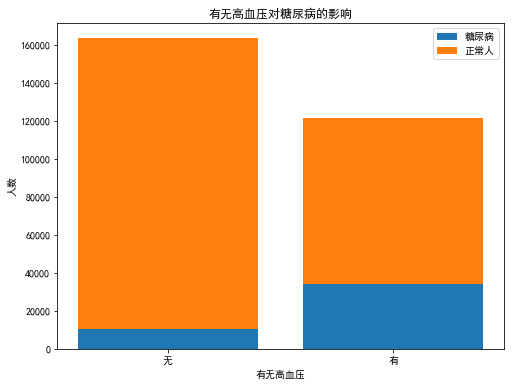

In [12]:
#HighBp
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
# 显示中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False  # 正确显示负号

dataConcat1 = pd.read_csv('diabetes_data01.csv')

# 计算HighBP中糖尿病患者和正常人的数量
diabetes_0 = dataConcat1[dataConcat1['target'] == 0]['HighBP'].value_counts()
diabetes_1 = dataConcat1[dataConcat1['target'] == 1]['HighBP'].value_counts()

# 创建一个DataFrame来存储这些计数
df = pd.DataFrame({'糖尿病患者': diabetes_1, '正常人': diabetes_0})

sex_map = {1: '有', 0: '无'}
# 只保留索引值为0或1的行
df = df[df.index.isin([0, 1])]
df.index = df.index.map(sex_map)


df.index = df.index.astype(str)

# 创建一个条形图
fig = plt.figure(figsize=(8, 6))
a1=plt.subplot(111)  # 使用1x1的子图布局
a1.bar(df.index, df['糖尿病患者'], label='糖尿病')
a1.bar(df.index, df['正常人'], bottom=df['糖尿病患者'], label='正常人')

# 添加标题和标签
plt.title("有无高血压对糖尿病的影响")
plt.xlabel("有无高血压")
plt.ylabel("人数")
plt.legend(loc='best')

# 显示图表
plt.show()

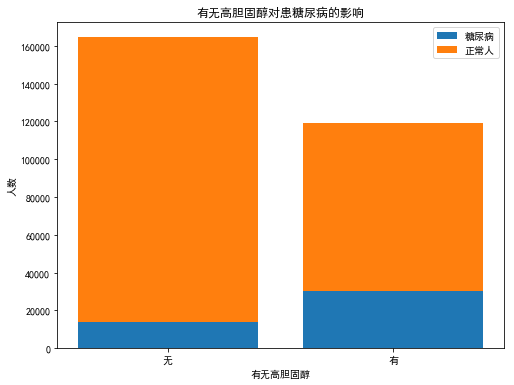

In [13]:
#HighChol
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
# 显示中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False  # 正确显示负号

dataConcat1 = pd.read_csv('diabetes_data01.csv')

# 计算HighChol中糖尿病患者和正常人的数量
diabetes_0 = dataConcat1[dataConcat1['target'] == 0]['HighChol'].value_counts()
diabetes_1 = dataConcat1[dataConcat1['target'] == 1]['HighChol'].value_counts()

# 创建一个DataFrame来存储这些计数
df = pd.DataFrame({'糖尿病患者': diabetes_1, '正常人': diabetes_0})

sex_map = {1: '有', 0: '无'}
# 只保留索引值为0或1的行
df = df[df.index.isin([0, 1])]
df.index = df.index.map(sex_map)
df.index = df.index.astype(str)

# 创建一个条形图
fig = plt.figure(figsize=(8, 6))
a1=plt.subplot(111)  # 使用1x1的子图布局
a1.bar(df.index, df['糖尿病患者'], label='糖尿病')
a1.bar(df.index, df['正常人'], bottom=df['糖尿病患者'], label='正常人')

# 添加标题和标签
plt.title("有无高胆固醇对患糖尿病的影响")
plt.xlabel("有无高胆固醇")
plt.ylabel("人数")
plt.legend(loc='best')

# 显示图表
plt.show()

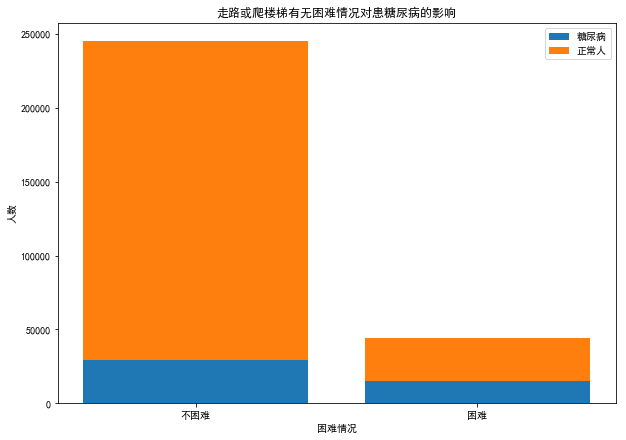

In [14]:
#DiffWalk
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
# 显示中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False  # 正确显示负号

dataConcat1 = pd.read_csv('diabetes_data01.csv')

# 计算吸烟者中糖尿病患者和正常人的数量
diabetes_0 = dataConcat1[dataConcat1['target'] == 0]['DiffWalk'].value_counts()
diabetes_1 = dataConcat1[dataConcat1['target'] == 1]['DiffWalk'].value_counts()

# 创建一个DataFrame来存储这些计数
df = pd.DataFrame({'糖尿病患者': diabetes_1, '正常人': diabetes_0})

sex_map = {1: '困难', 0: '不困难'}
# 只保留索引值为0或1的行
df = df[df.index.isin([0, 1])]
df.index = df.index.map(sex_map)
df.index = df.index.astype(str)

# 创建一个条形图
fig = plt.figure(figsize=(10, 7))
a1=plt.subplot(111)  # 使用1x1的子图布局
a1.bar(df.index, df['糖尿病患者'], label='糖尿病')
a1.bar(df.index, df['正常人'], bottom=df['糖尿病患者'], label='正常人')

# 添加标题和标签
plt.title("走路或爬楼梯有无困难情况对患糖尿病的影响")
plt.xlabel("困难情况")
plt.ylabel("人数")
plt.legend(loc='best')

# 显示图表
plt.show()

# 相关性分析与特征选择

### 热力图

d:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20851 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 28909 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\lib\site-

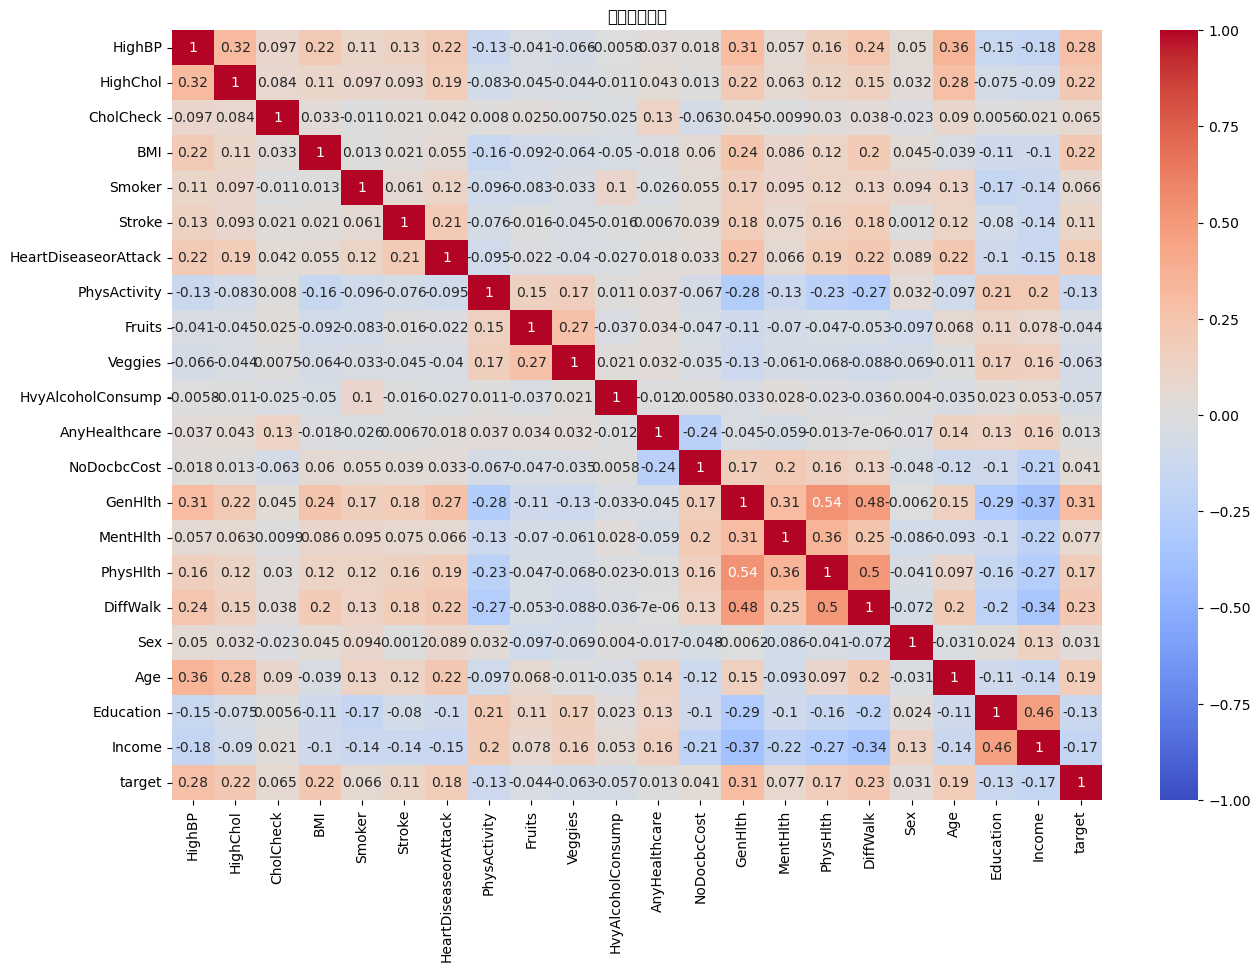

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_data01.csv')

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
 
# 计算相关性矩阵
correlation_matrix = df[numerical_features].corr()
 
# 绘制热力图
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('相关性热力图')
plt.show()

###  皮尔逊相关系数

In [18]:
#皮尔逊相关系数计算
import pandas as pd
from scipy.stats import pearsonr

# 读取数据
data = pd.read_csv('diabetes_data01.csv')

# 定义特征和目标变量
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
            'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
            'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
x1 = data[features]
y1 = data['target']

# 计算每个特征与目标变量之间的皮尔逊相关系数
correlations = []
for feature in features:
    correlation, p_value = pearsonr(x1[feature], y1)
    correlations.append((feature, correlation, p_value))

# 打印结果
for feature, correlation, p_value in correlations:
    print(f"特征 {feature} - 皮尔逊相关系数: {correlation}, p值: {p_value}")

特征 HighBP - 皮尔逊相关系数: 0.2810604992817686, p值: 0.0
特征 HighChol - 皮尔逊相关系数: 0.2218985084896173, p值: 0.0
特征 CholCheck - 皮尔逊相关系数: 0.06538678417851138, p值: 1.7094945351695452e-281
特征 BMI - 皮尔逊相关系数: 0.22137074698328757, p值: 0.0
特征 Smoker - 皮尔逊相关系数: 0.06573508129120341, p值: 1.7484286257588203e-284
特征 Stroke - 皮尔逊相关系数: 0.10896659044808003, p值: 0.0
特征 HeartDiseaseorAttack - 皮尔逊相关系数: 0.18198784205483465, p值: 0.0
特征 PhysActivity - 皮尔逊相关系数: -0.1255405347131112, p值: 0.0
特征 Fruits - 皮尔逊相关系数: -0.04427949892526636, p值: 4.6284009558615696e-130
特征 Veggies - 皮尔逊相关系数: -0.06315660340288484, p值: 1.0011121945096135e-262
特征 HvyAlcoholConsump - 皮尔逊相关系数: -0.05658295438914437, p值: 3.2319288236695862e-211
特征 AnyHealthcare - 皮尔逊相关系数: 0.012749583552183114, p值: 2.879375469501823e-12
特征 NoDocbcCost - 皮尔逊相关系数: 0.04129343517421183, p值: 2.3558294540577168e-113
特征 GenHlth - 皮尔逊相关系数: 0.30582549174355533, p值: 0.0
特征 MentHlth - 皮尔逊相关系数: 0.07681426731565548, p值: 0.0
特征 PhysHlth - 皮尔逊相关系数: 0.17498088868041536, p值: 0.0
特征 DiffWa

### 互信息系数

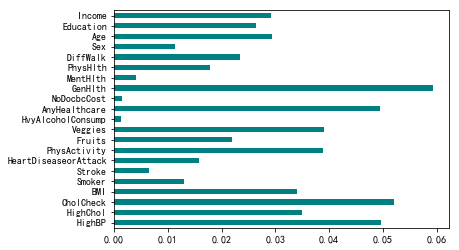

In [17]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# 读取数据
data = pd.read_csv('diabetes_data01.csv')

# 定义特征和目标变量
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
            'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
            'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
x1 = data[features]
y1 = data['target']

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
importances = mutual_info_classif(x1, y1)
feat_importances = pd.Series(importances, data.columns[0:len(data.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.savefig('./mutual_info_classif.png')
plt.show()
plt.close()


# KNN模型训练

In [ ]:
import pandas as pd  
import numpy as np  
from sklearn.linear_model import Lasso  
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LinearRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score

# 读入数据  
data = pd.read_csv('diabetes_data01.csv')  

# 特征和目标变量  
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',   
            'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',   
            'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',   
            'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',   
            'Sex', 'Age', 'Education', 'Income']  
x1 = data[features]  
y1 = data['target']  

# 分割数据集  
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)  

# 使用Lasso回归选择特征  
lasso = Lasso(alpha=0.01)  # alpha是正则化强度参数，可以调整  
lasso.fit(X_train, y_train)  

# 获取特征重要性（系数不为零的特征）  
selected_features = x1.columns[(lasso.coef_ != 0)]  
print("Selected Features from Lasso:", selected_features)  

# 使用随机森林计算特征重要性  
rf = RandomForestClassifier(n_estimators=100, random_state=42)  
rf.fit(X_train, y_train)  
importances = rf.feature_importances_  
feature_importance = pd.Series(importances, index=x1.columns).sort_values(ascending=False)  
print("Feature Importance from Random Forest:\n", feature_importance)  

# 使用线性回归计算特征系数  
lr = LinearRegression()  
lr.fit(X_train, y_train)  
coefficients = pd.Series(lr.coef_, index=x1.columns).sort_values(ascending=False)  
print("Coefficients from Linear Regression:\n", coefficients)  

# 选择重要特征（例如前k个特征）  
k = 15  # 可以根据具体情况调整  
important_features = feature_importance.head(k).index  
print("Important Features:", important_features)  

# 使用KNN模型进行训练  
model = KNeighborsClassifier(n_neighbors=1)  
model.fit(X_train[important_features], y_train)  

# 使用cross_val_predict进行预测得到每个样本的预测值  
y_pred_cross_val = cross_val_predict(model, X_train[important_features], y_train, cv=5)  


# 使用KNN模型进行测试集预测  
y_pred = model.predict(X_test[important_features])  

accuracy = accuracy_score(y_test, y_pred)
print("准确率: ",accuracy)

# 计算偏差  
bias = np.mean((y_test - y_pred) ** 2)  
print("偏差:", bias)  

# 计算方差  
y_pred_mean = np.mean(y_pred)  
variance = np.mean((y_pred - y_pred_mean) ** 2)  
print("方差:", variance)  

# 计算F1分数  
f1 = f1_score(y_test, y_pred, average='macro')  
print("F1 Score:", f1)  


Selected Features from Lasso: Index(['HighBP', 'HighChol', 'BMI', 'GenHlth', 'PhysHlth', 'Age', 'Income'], dtype='object')
Feature Importance from Random Forest:
 BMI                     0.161339
Age                     0.110700
Income                  0.089108
GenHlth                 0.083687
PhysHlth                0.069035
Education               0.064889
HighBP                  0.059341
MentHlth                0.052059
HighChol                0.044652
Smoker                  0.036292
Fruits                  0.034879
Sex                     0.032669
PhysActivity            0.029742
DiffWalk                0.029019
Veggies                 0.027853
HeartDiseaseorAttack    0.023695
NoDocbcCost             0.015619
Stroke                  0.013446
HvyAlcoholConsump       0.009238
AnyHealthcare           0.008794
CholCheck               0.003943
dtype: float64
Coefficients from Linear Regression:
 HighBP                  0.085511
HeartDiseaseorAttack    0.070957
HighChol                0

# 随机森林模型训练

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import  mutual_info_regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# 加载数据
data = pd.read_csv('diabetes_data01.csv')

# 定义特征变量和目标变量
X = data.drop('target', axis=1)
y = data['target']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 将标准化后的数据转换回 DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# 计算皮尔逊相关系数
pearson_corr = X_train.corrwith(y_train)

# 计算互信息系数
mi_scores = mutual_info_regression(X_train, y_train)

# 结合L1正则化选择特征
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_
lasso_selected_features = X.columns[lasso_coef != 0]

# 使用L2正则化进行交叉检验
ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_avg_score = -ridge_scores.mean()

# 使用随机森林对模型的特征打分
rf = RandomForestRegressor(n_estimators=30, random_state=42)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

# 将目标变量转换为分类变量
y_train = pd.cut(y_train, bins=2, labels=[0, 1])
y_test = pd.cut(y_test, bins=2, labels=[0, 1])

# 使用随机森林对测试集进行预测
rf_pred = rf.predict(X_test)

# 将预测结果转换为二分类问题的预测结果
rf_pred_binary = np.where(rf_pred > 0.5, 1, 0)

accuracy = accuracy_score(y_test, rf_pred_binary)
print("准确率: ",accuracy)

y_test = y_test.astype(int)
# 计算偏差  
bias = np.mean((y_test - rf_pred) ** 2)  
print("偏差:", bias)  

# 计算方差  
y_pred_mean = np.mean(rf_pred)  
variance = np.mean((rf_pred - y_pred_mean) ** 2)  
print("方差:", variance)  

# 计算随机森林的F1分数
rf_f1 = f1_score(y_test, rf_pred_binary, average='weighted')

# 设置显示选项
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 输出结果
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Pearson Coefficient': pearson_corr,
    'Mutual Information': mi_scores,
    'Lasso Coefficient': lasso_coef,
    'Importance': rf_importances
})

print('特征评分：')
print(feature_scores)
print('L2正则化交叉检验平均得分：', ridge_avg_score)
print('随机森林的F1分数：', rf_f1)

准确率:  0.8715333333333334
偏差: 0.0960636702861523
方差: 0.04586931707174984
特征评分：
                                   Feature  Pearson Coefficient  \
HighBP                              HighBP             0.280095   
HighChol                          HighChol             0.220349   
CholCheck                        CholCheck             0.065281   
BMI                                    BMI             0.223109   
Smoker                              Smoker             0.066449   
Stroke                              Stroke             0.108230   
HeartDiseaseorAttack  HeartDiseaseorAttack             0.182453   
PhysActivity                  PhysActivity            -0.125347   
Fruits                              Fruits            -0.043441   
Veggies                            Veggies            -0.062906   
HvyAlcoholConsump        HvyAlcoholConsump            -0.057672   
AnyHealthcare                AnyHealthcare             0.013437   
NoDocbcCost                    NoDocbcCost         

## 决策树

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectFromModel, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# 读取数据
data = pd.read_csv('diabetes_data01.csv')

# 定义特征变量和目标变量
X = data.drop('target', axis=1)
y = data['target']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 将标准化后的数据转换回DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# 计算皮尔逊系数
pearson_corr = X_train.corrwith(y_train)

# 计算互信息系数
mi_scores = mutual_info_regression(X_train, y_train)

# 结合L1正则化选择特征
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_
lasso_selected_features = X.columns[lasso_coef != 0]

# 使用L2正则化进行交叉检验
ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_avg_score = -ridge_scores.mean()

# 使用决策树对模型的特征打分
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_importances = dt.feature_importances_

# 使用决策树对测试集进行预测
dt_pred = dt.predict(X_test)

# 将预测结果转换为二分类问题的预测结果
dt_pred_binary = np.where(dt_pred > 0.5, 1, 0)

accuracy = accuracy_score(y_test, dt_pred_binary)
print("准确率: ",accuracy)

# 计算偏差  
bias = np.mean((y_test - dt_pred) ** 2)  
print("偏差:", bias)  

# 计算方差  
y_pred_mean = np.mean(dt_pred)  
variance = np.mean((dt_pred - y_pred_mean) ** 2)  
print("方差 :", variance)  

# 计算决策树的F1分数
dt_f1 = f1_score(y_test, dt_pred_binary, average='weighted')
# 设置显示选项
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# 输出结果
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Pearson Coefficient': pearson_corr,
    'Mutual Information': mi_scores,
    'Lasso Coefficient': lasso_coef,
    'Decision Tree Importance': [dt_importances[i] for i in range(len(X.columns))]
})

print('特征评分：')
print(feature_scores)
print('L2正则化交叉检验平均得分：', ridge_avg_score)
print('决策树的F1分数：', dt_f1)

准确率:  0.8207833333333333
偏差: 0.17924784606029218
方差 : 0.14014285923339406
特征评分：
                                   Feature  Pearson Coefficient  \
HighBP                              HighBP             0.280095   
HighChol                          HighChol             0.220349   
CholCheck                        CholCheck             0.065281   
BMI                                    BMI             0.223109   
Smoker                              Smoker             0.066449   
Stroke                              Stroke             0.108230   
HeartDiseaseorAttack  HeartDiseaseorAttack             0.182453   
PhysActivity                  PhysActivity            -0.125347   
Fruits                              Fruits            -0.043441   
Veggies                            Veggies            -0.062906   
HvyAlcoholConsump        HvyAlcoholConsump            -0.057672   
AnyHealthcare                AnyHealthcare             0.013437   
NoDocbcCost                    NoDocbcCost       

## 模型提升部分

#### 对相关性较高的特征进行加权处理

In [ ]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import Lasso, Ridge  
from sklearn.feature_selection import SelectFromModel, f_regression, mutual_info_regression  
from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.preprocessing import StandardScaler  
import numpy as np  
import pandas as pd  
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score

# 读取数据  
data = pd.read_csv('diabetes_data01.csv')  

# 定义特征变量和目标变量  
X = data.drop('target', axis=1)  
y = data['target']  

# 定义需要加权的特征和对应的权重  
weights = {  
    'BMI': 1.5,          # 样本权重  
    'GenHlth': 1.2,  
    'HighBP': 1.3,  
    'HighChol': 1.3,  
    'MentHlth': 1.5,  
    'PhysHlth': 1.4,  
    'Age': 1.1  
}  

# 对指定字段加权  
for feature, weight in weights.items():  
    if feature in X.columns:  
        X[feature] = X[feature] * weight  

# 数据标准化  
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)  

# 将标准化后的数据转换回DataFrame  
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  

# 划分训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)  

# 计算皮尔逊系数  
pearson_corr = X_train.corrwith(y_train)  

# 计算互信息系数  
mi_scores = mutual_info_regression(X_train, y_train)  

# 结合L1正则化选择特征  
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)  
lasso_coef = lasso.coef_  
lasso_selected_features = X.columns[lasso_coef != 0]  

# 使用L2正则化进行交叉检验  
ridge = Ridge(alpha=1.0)  
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  
ridge_avg_score = -ridge_scores.mean()  

# 使用决策树对模型的特征打分  
dt = DecisionTreeRegressor(random_state=42)  
dt.fit(X_train, y_train)  
dt_importances = dt.feature_importances_  

# 使用决策树对测试集进行预测  
dt_pred = dt.predict(X_test)  

# 将预测结果转换为二分类问题的预测结果  
dt_pred_binary = np.where(dt_pred > 0.5, 1, 0)  

accuracy = accuracy_score(y_test, dt_pred_binary)
print("准确率: ",accuracy)

# 计算偏差  
bias = np.mean((y_test - dt_pred) ** 2)  
print("偏差:", bias)  

# 计算方差  
y_pred_mean = np.mean(dt_pred)  
variance = np.mean((dt_pred - y_pred_mean) ** 2)  
print("方差:", variance)  

# 计算决策树的F1分数  
dt_f1 = f1_score(y_test, dt_pred_binary, average='weighted')  

# 设置显示选项  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

# 输出结果  
feature_scores = pd.DataFrame({  
    'Feature': X.columns,  
    'Pearson Coefficient': pearson_corr,  
    'Mutual Information': mi_scores,  
    'Lasso Coefficient': lasso_coef,  
    'Decision Tree Importance': [dt_importances[i] for i in range(len(X.columns))]  
})  

print('特征评分：')  
print(feature_scores)  
print('L2正则化交叉检验平均得分：', ridge_avg_score)  
print('决策树的F1分数：', dt_f1)

准确率:  0.8207833333333333
偏差: 0.17924784606029218
方差: 0.14014285923339406
特征评分：
                                   Feature  Pearson Coefficient  \
HighBP                              HighBP             0.280095   
HighChol                          HighChol             0.220349   
CholCheck                        CholCheck             0.065281   
BMI                                    BMI             0.223109   
Smoker                              Smoker             0.066449   
Stroke                              Stroke             0.108230   
HeartDiseaseorAttack  HeartDiseaseorAttack             0.182453   
PhysActivity                  PhysActivity            -0.125347   
Fruits                              Fruits            -0.043441   
Veggies                            Veggies            -0.062906   
HvyAlcoholConsump        HvyAlcoholConsump            -0.057672   
AnyHealthcare                AnyHealthcare             0.013437   
NoDocbcCost                    NoDocbcCost        

### 逻辑回归

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# 读取数据
data = pd.read_csv('diabetes_data01.csv')

# 定义特征和目标变量
X = data.drop('target', axis=1)
y = data['target']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 计算互信息系数
mi_scores = mutual_info_regression(X_train, y_train)

# 使用逻辑回归进行分类
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 超参数调优
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga']  
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_log_reg = grid_search.best_estimator_

# 拟合最佳模型
best_log_reg.fit(X_train, y_train)

# 进行预测
y_pred = best_log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("准确率: ",accuracy)

# 计算偏差  
bias = np.mean((y_test - y_pred) ** 2)  
print("偏差:", bias)  

# 计算方差  
y_pred_mean = np.mean(y_pred)  
variance = np.mean((y_pred - y_pred_mean) ** 2)  
print("方差:", variance)  

# 计算F1分数
f1 = f1_score(y_test, y_pred, average='weighted')

print('最优超参数:', grid_search.best_params_)
print('逻辑回归的F1分数:', f1)

准确率:  0.8446666666666667
偏差: 0.15533333333333332
方差: 0.052286377500000016
最优超参数: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
逻辑回归的F1分数: 0.8112738788698182


### 绘制关于错误预测样本的特征分布情况的箱线图和直方图

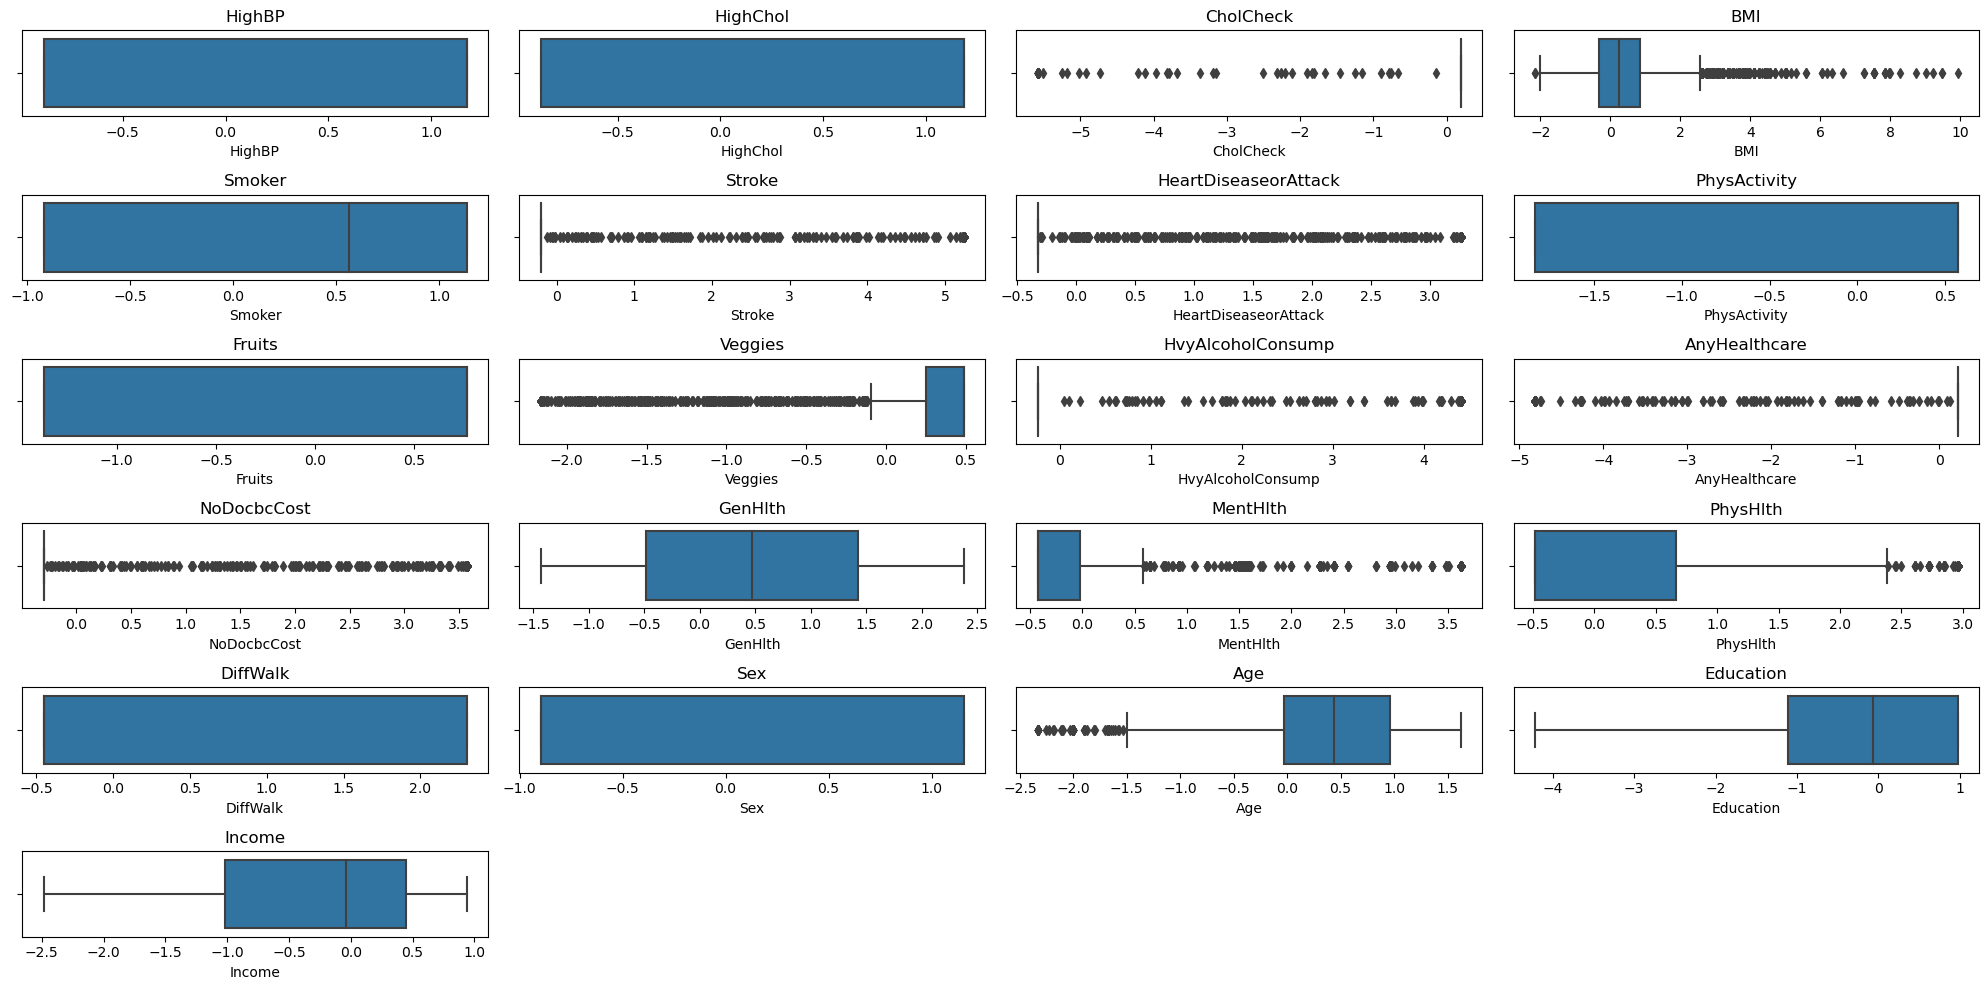

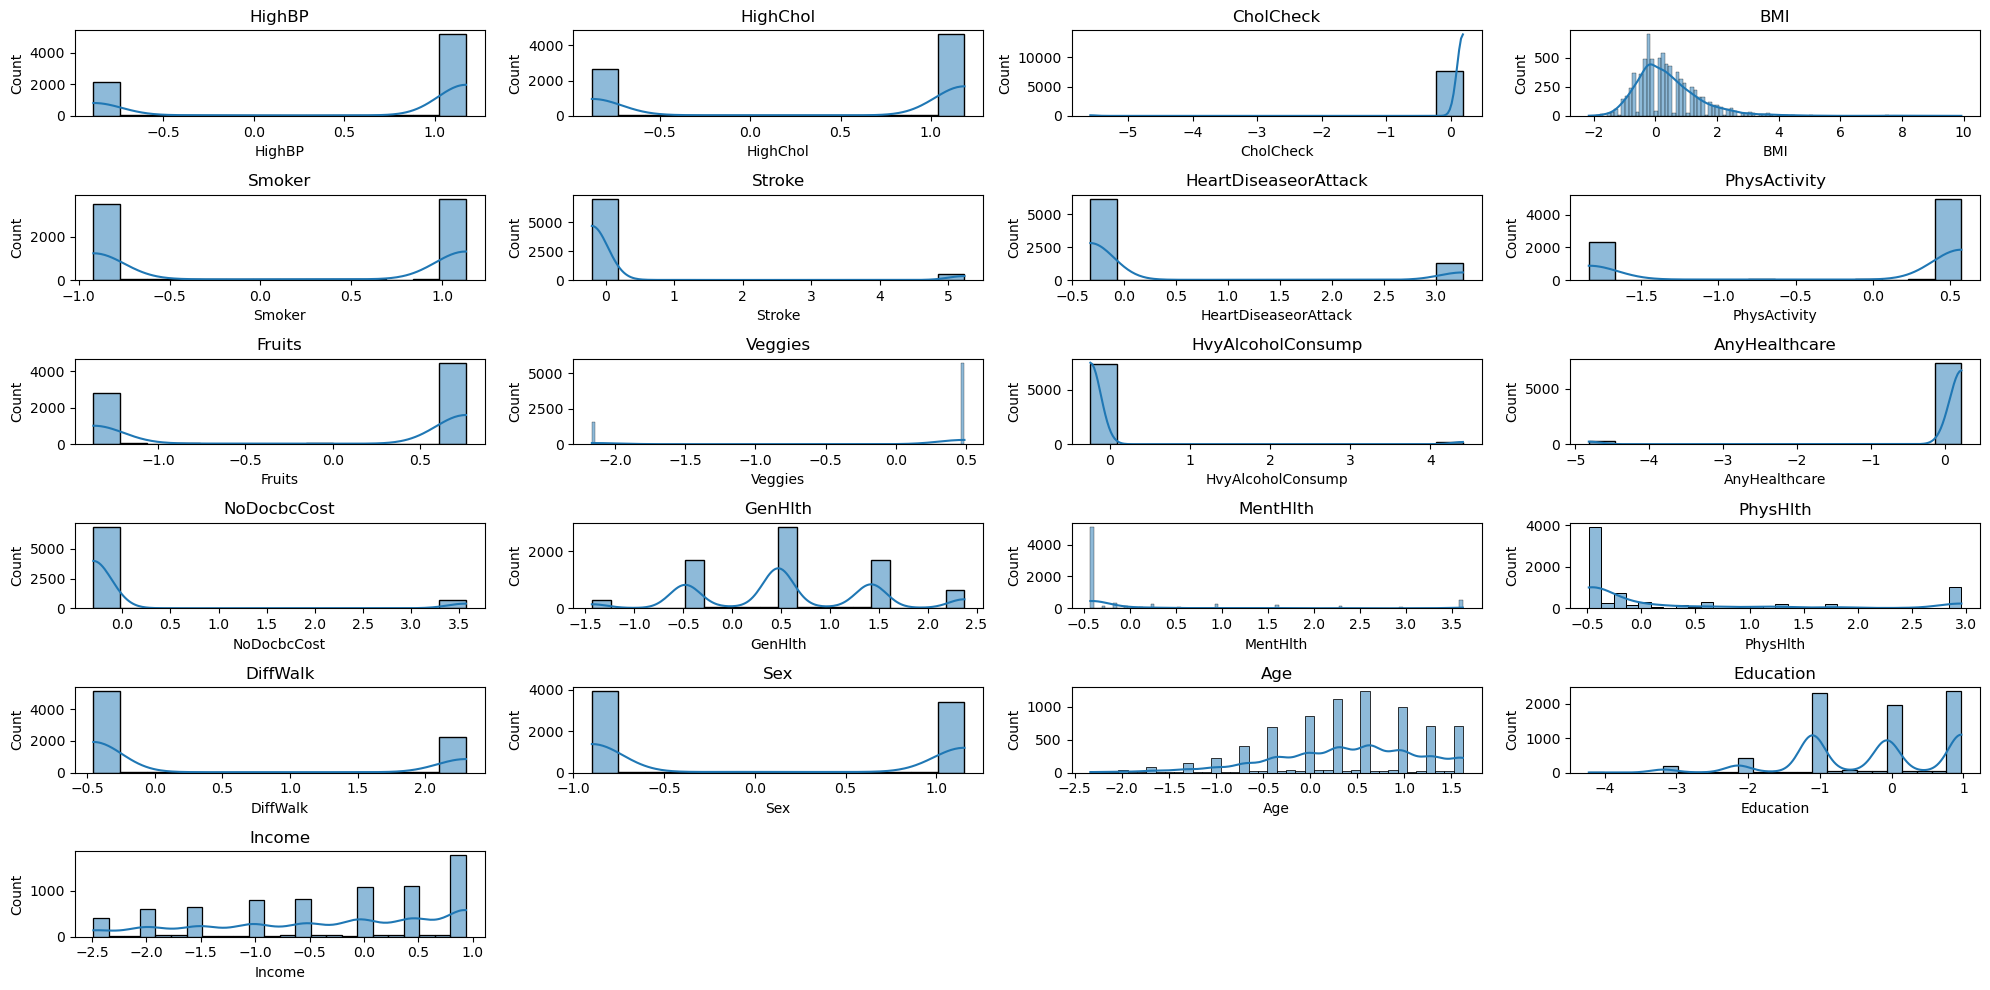

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 加载数据
data = pd.read_csv('diabetes_data01.csv')

# 定义特征变量和目标变量
X = data.drop('target', axis=1)
y = data['target']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 将标准化后的数据转换回 DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# 用随机森林进行特征打分
rf = RandomForestRegressor(n_estimators=30, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 将目标变量转换为分类变量
y_train_class = pd.cut(y_train, bins=2, labels=[0, 1])
y_test_class = pd.cut(y_test, bins=2, labels=[0, 1])

# 将预测结果转换为二分类问题的预测结果
rf_pred_binary = np.where(rf_pred > 0.5, 1, 0)
rf = RandomForestRegressor(n_estimators=30, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 将目标变量转换为分类变量
y_train_class = pd.cut(y_train, bins=2, labels=[0, 1])
y_test_class = pd.cut(y_test, bins=2, labels=[0, 1])

# 计算混淆矩阵
cm = confusion_matrix(y_test, rf_pred_binary)

# 找出预测错误的样本
incorrect_predictions = X_test[rf_pred_binary != y_test_class]

# 设置图形的大小
plt.figure(figsize=(20, 10))

# 绘制箱线图
num_features = len(X.columns)
num_cols = 4  
num_rows = (num_features + num_cols - 1) // num_cols  

for i, feature in enumerate(X.columns):
    plt.subplot(num_rows, num_cols, i+1)  
    sns.boxplot(x=incorrect_predictions[feature])
    plt.title(feature)

plt.tight_layout() 
plt.show()

# 设置图形的大小
plt.figure(figsize=(20, 10))

# 绘制直方图
for i, feature in enumerate(X.columns):
    plt.subplot(num_rows, num_cols, i+1)  
    sns.histplot(incorrect_predictions[feature], kde=True) 
    plt.title(feature)

plt.tight_layout()
plt.show()

### 梯度提升决策树

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectFromModel, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.metrics import accuracy_score

data = pd.read_csv('diabetes_data01.csv')

# 定义特征变量和目标变量
X = data.drop('target', axis=1)
y = data['target']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 计算皮尔逊系数
pearson_scores, _ = f_regression(X_train, y_train)

# 计算互信息系数
mi_scores = mutual_info_regression(X_train, y_train)

# 结合L1正则化选择特征
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_
lasso_selected_features = X.columns[lasso_coef != 0]

# 用L2正则化进行交叉检验
ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_avg_score = -ridge_scores.mean()

# 用梯度提升决策树对模型的特征打分
gbdt = GradientBoostingRegressor(random_state=42)
gbdt.fit(X_train, y_train)
gbdt_importances = gbdt.feature_importances_

# 用梯度提升决策树对测试集进行预测
gbdt_pred = gbdt.predict(X_test)

# 把预测结果转换为二分类问题的预测结果
gbdt_pred_binary = np.where(gbdt_pred > 0.5, 1, 0)

accuracy = accuracy_score(y_test, gbdt_pred_binary)
print("准确率: ",accuracy)

# 计算偏差  
bias = np.mean((y_test - gbdt_pred) ** 2)  
print("Bias:", bias)  

# 计算方差  
y_pred_mean = np.mean(gbdt_pred)  
variance = np.mean((gbdt_pred - y_pred_mean) ** 2)  
print("Variance:", variance)  

# 计算F1分数
gbdt_f1 = f1_score(y_test, gbdt_pred_binary, average='weighted')

# 设置显示选项
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Pearson Coefficient': pearson_scores,
    'Mutual Information': mi_scores,
    'Lasso Coefficient': lasso_coef,
    'Gradient Boosting Decision Tree Importance': gbdt_importances
})

print('特征评分：')
print(feature_scores)
print('L2正则化交叉检验平均得分：', ridge_avg_score)
print('梯度提升决策树的F1分数：', gbdt_f1)

准确率:  0.8494333333333334
Bias: 0.10677978699966714
Variance: 0.026708041377611593
特征评分：
                 Feature  Pearson Coefficient  Mutual Information  \
0                 HighBP         20431.549365            0.043708   
1               HighChol         12247.488398            0.030183   
2              CholCheck          1027.155725            0.003877   
3                    BMI         12572.294015            0.034310   
4                 Smoker          1064.393104            0.002723   
5                 Stroke          2844.573389            0.008460   
6   HeartDiseaseorAttack          8264.407942            0.017870   
7           PhysActivity          3831.012829            0.006726   
8                 Fruits           453.753407            0.002126   
9                Veggies           953.477622            0.004010   
10     HvyAlcoholConsump           800.915440            0.003130   
11         AnyHealthcare            43.337680            0.000000   
12           No

### 随机森林优化

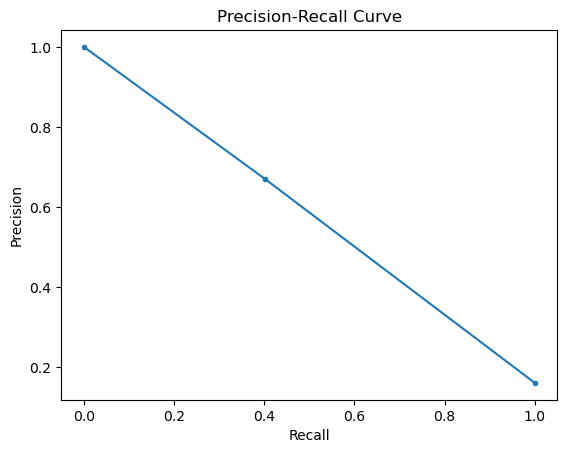

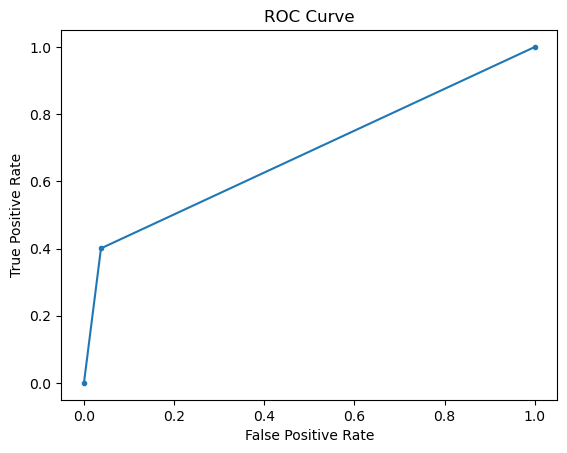

Best Threshold: 0.6060606060606061
Best F1 Score: 0.8622740171357229


In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import  mutual_info_regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, f1_score
import matplotlib.pyplot as plt
# 加载数据
data = pd.read_csv('diabetes_data01.csv')

# 定义特征变量和目标变量
X = data.drop('target', axis=1)
y = data['target']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 将标准化后的数据转换回 DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# 结合L1正则化选择特征
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_
lasso_selected_features = X.columns[lasso_coef != 0]

# 使用L2正则化进行交叉检验
ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_avg_score = -ridge_scores.mean()

# 使用随机森林对模型的特征打分
rf = RandomForestRegressor(n_estimators=30, random_state=42)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

# 将目标变量转换为分类变量
y_train = pd.cut(y_train, bins=2, labels=[0, 1])
y_test = pd.cut(y_test, bins=2, labels=[0, 1])

# 使用随机森林对测试集进行预测
rf_pred = rf.predict(X_test)

# 将预测结果转换为二分类问题的预测结果
rf_pred_binary = np.where(rf_pred > 0.5, 1, 0)

# 将预测结果转换为概率,使用了Sigmoid函数，因为这是一个二分类问题。
probs = 1 / (1 + np.exp(-rf_pred))
# 计算PR曲线
precision, recall, thresholds = precision_recall_curve(y_test, rf_pred_binary)
pr_auc = auc(recall, precision)

# 绘制PR曲线
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_binary)
roc_auc = auc(fpr, tpr)
# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 找到最佳阈值以优化F1分数
thresholds = np.linspace(0, 1, 100)
f1_scores = []

for threshold in thresholds:
    y_pred = (probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {max(f1_scores)}")


### 采用上采集方式处理样本处理样本不平衡问题 利用ROC和PR曲线对模型进行优化

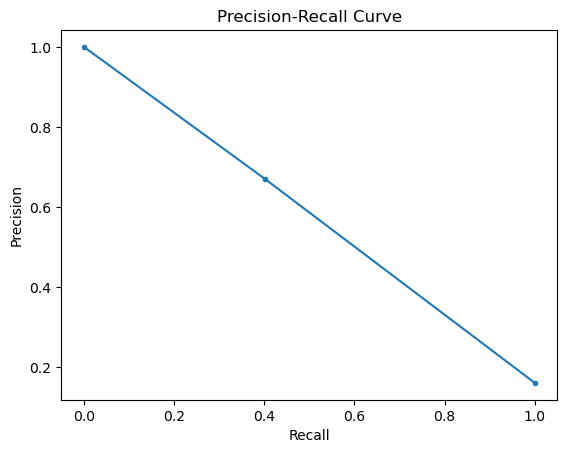

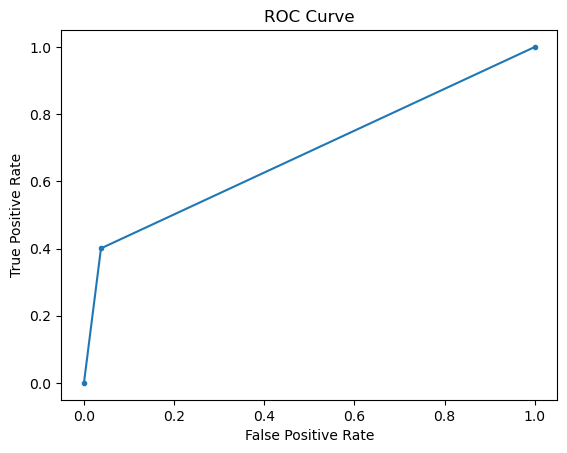

最佳阈值: 0.9090909090909092
F1 Score: 0.824305099422011


In [9]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import Lasso, Ridge  
from sklearn.feature_selection import SelectFromModel, f_regression, mutual_info_regression  
from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.preprocessing import StandardScaler  
import numpy as np  
import pandas as pd  
from sklearn.metrics import f1_score  
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, f1_score

# 读取数据  
data = pd.read_csv('C:\\Users\\13639\\Desktop\\machine\\diabetes_data01.csv')  

# 定义特征变量和目标变量  
X = data.drop('target', axis=1)  
y = data['target']  

# 数据标准化  
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)  

# 将标准化后的数据转换回DataFrame  
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  

# 划分训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)  

# 上采样处理数据不平衡
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)


# 结合L1正则化选择特征  
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)  
lasso_coef = lasso.coef_  
lasso_selected_features = X.columns[lasso_coef != 0]  

# 使用L2正则化进行交叉检验  
ridge = Ridge(alpha=1.0)  
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  
ridge_avg_score = -ridge_scores.mean()  

# 使用决策树对模型的特征打分  
dt = DecisionTreeRegressor(random_state=42)  
dt.fit(X_train, y_train)  
dt_importances = dt.feature_importances_  

# 使用决策树对测试集进行预测  
dt_pred = dt.predict(X_test)  

# 将预测结果转换为二分类问题的预测结果  
dt_pred_binary = np.where(dt_pred > 0.5, 1, 0) 
 # 计算PR曲线
precision, recall, thresholds = precision_recall_curve(y_test, rf_pred_binary)
pr_auc = auc(recall, precision)

# 绘制PR曲线
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_binary)
roc_auc = auc(fpr, tpr)
# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 找到最佳阈值
thresholds = np.linspace(0, 1, 100)
f1_scores = []

for threshold in thresholds:
    y_pred = (dt_pred >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

best_threshold = thresholds[np.argmax(f1_scores)]
print(f"最佳阈值: {best_threshold}")
print(f"F1 Score: {max(f1_scores)}")